In [1]:
#항상 불러와야되는거
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

- baseline 모델링
- 데이터 로딩
- 문제, 답 나누기
- 데이터 탐색( 결측치 확인, 시각화)
- KNN, DecisionTree 모델 학습 및 예측

In [2]:
from sklearn.metrics import accuracy_score 

In [3]:
train=pd.read_csv("smhrd20210201 (1)/train.csv")
test=pd.read_csv("smhrd20210201 (1)/test.csv")

In [4]:
display(train)

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29301,29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29302,29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0
29303,29304,33,Private,157446,11th,7,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,0


In [5]:
print('train data shape : ', train.shape)
print('test data shape : ', test.shape)
print('----------[train infomation]----------')
print(train.info())
print('----------[test infomation]----------')
print(test.info())

train data shape :  (29305, 16)
test data shape :  (19537, 15)
----------[train infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  object
 3   fnlwgt          29305 non-null  int64 
 4   education       29305 non-null  object
 5   education-num   29305 non-null  int64 
 6   marital-status  29305 non-null  object
 7   occupation      29305 non-null  object
 8   relationship    29305 non-null  object
 9   race            29305 non-null  object
 10  sex             29305 non-null  object
 11  capital-gain    29305 non-null  int64 
 12  capital-loss    29305 non-null  int64 
 13  hours-per-week  29305 non-null  int64 
 14  native-country  29305 non-null  object
 15  income          29305 non-null  int6

In [6]:
print(train["income"].value_counts())
print()
print('----------[train infomation]----------')
print(train.describe())
print('----------[test infomation]----------')
print(test.describe())

0    22260
1     7045
Name: income, dtype: int64

----------[train infomation]----------
                 no           age        fnlwgt  education-num  capital-gain  \
count  29305.000000  29305.000000  2.930500e+04   29305.000000  29305.000000   
mean   14653.000000     38.659171  1.897357e+05      10.083057   1084.531786   
std     8459.769156     13.743827  1.056348e+05       2.570371   7495.715677   
min        1.000000     17.000000  1.376900e+04       1.000000      0.000000   
25%     7327.000000     28.000000  1.176060e+05       9.000000      0.000000   
50%    14653.000000     37.000000  1.779550e+05      10.000000      0.000000   
75%    21979.000000     48.000000  2.377130e+05      12.000000      0.000000   
max    29305.000000     90.000000  1.490400e+06      16.000000  99999.000000   

       capital-loss  hours-per-week        income  
count  29305.000000    29305.000000  29305.000000  
mean      87.073571       40.440096      0.240403  
std      401.225580       12.33284

In [7]:
train.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### 학습

In [10]:
#전처리

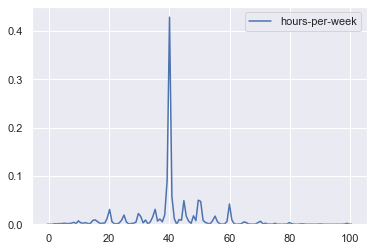

In [11]:
sns.kdeplot(train["hours-per-week"])

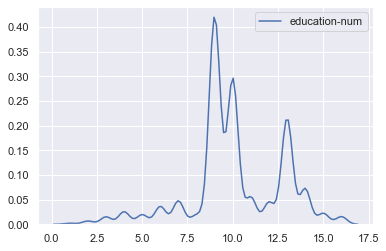

In [12]:
sns.kdeplot(train["education-num"])

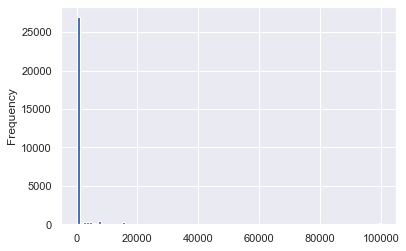

In [13]:
train["capital-gain"].plot(kind="hist", bins=100)

In [14]:
display(train["hours-per-week"].describe())
display(train["education-num"].describe())
display(train["capital-gain"].describe())
display(train["occupation"].describe())

count    29305.000000
mean        40.440096
std         12.332840
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

count    29305.000000
mean        10.083057
std          2.570371
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

count    29305.000000
mean      1084.531786
std       7495.715677
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

count               29305
unique                 15
top        Prof-specialty
freq                 3724
Name: occupation, dtype: object

In [15]:
train["hours-per-week_cut"]=pd.cut(train["hours-per-week"], bins=[0,30,40,50,60,100],labels=["A","B","C","D","E"])
display(train["hours-per-week_cut"].value_counts().to_frame().style.background_gradient(cmap="summer"))
test["hours-per-week_cut"]=pd.cut(test["hours-per-week"], bins=[0,30,40,50,60,100],labels=["A","B","C","D","E"])
display(test["hours-per-week_cut"].value_counts().to_frame().style.background_gradient(cmap="summer"))

,hours-per-week_cut
B,15948
C,5360
A,4703
D,2292
E,1002


,hours-per-week_cut
B,10691
C,3557
A,3148
D,1467
E,674


In [61]:
train["education_num_cut"]=pd.cut(train["education-num"], bins=[0,7,9,12,17],labels=["A","B","C","D"])
display(train["education_num_cut"].value_counts().to_frame().style.background_gradient(cmap="summer"))
test["education_num_cut"]=pd.cut(test["education-num"], bins=[0,7,9,12,17],labels=["A","B","C","D"])
display(test["education_num_cut"].value_counts().to_frame().style.background_gradient(cmap="summer"))

,education_num_cut
B,9850
C,8768
D,7282
A,3405


,education_num_cut
B,6591
C,5772
D,4828
A,2346


In [69]:
train["age_cut"]=pd.cut(train["age"], bins=[16,28,37,48,100],labels=["A","B","C","D"])
display(train["age_cut"].value_counts().to_frame().style.background_gradient(cmap="summer"))
test["age_cut"]=pd.cut(test["age"], bins=[16,28,37,48,100],labels=["A","B","C","D"])
display(test["age_cut"].value_counts().to_frame().style.background_gradient(cmap="summer"))

,age_cut
A,7948
C,7330
B,7084
D,6943


,age_cut
A,5344
C,5017
B,4598
D,4578


In [104]:
#인코딩
# mapping 작업시 참고할 딕셔너리 생성
sex_dic={" Male":0, " Female":1}
education_dic={" Bachelors":0, " Some-college":1," 11th":2 ,
               " HS-grad":3," Prof-school":4,
               " Assoc-acdm":5," Assoc-voc":6,
               " 9th":7," 7th-8th":8,
               " 12th":9," Masters":10,
              " 1st-4th":11, " 10th":12,
              " Doctorate":13, " 5th-6th":14, " Preschool":15}
# education 안하는게 나을지도
race_dic={" White":0, " Asian-Pac-Islander":1, " Amer-Indian-Eskimo":2, 
         " Other":3, " Black":4}
hours_per_week_cut_dic={"A":0, "B":1, "C":2, "D":3, "E":4}
education_num_cut_dic={"A":0, "B":1, "C":2, "D":3}
marital_status_dic={" Married-civ-spouse":0, " Divorced":1," Never-married":3, " Separated":1, " Widowed":1,
                   " Married-spouse-absent":0," Married-AF-spouse":0 }
# 결혼 0, 혼자 1, 경험 없음 3
workclass_dic={" Private":0, " Self-emp-not-inc":0," Self-emp-inc":0," Federal-gov":0
              , " Local-gov":0," State-gov":0," Without-pay":1, " Never-worked":1 ," ?":1 }
# 돈 벌고 못벌고 0,1
occupation_dic={" Tech-support":0, " Craft-repair":1," Other-service":2, " Sales":3,
             " Exec-managerial":4, " Prof-specialty":5,  " Handlers-cleaners":6, 
             " Machine-op-inspct":7, " Adm-clerical":8,  " Farming-fishing":9,
        " Transport-moving":10," Priv-house-serv":11, " Protective-serv":12,  " Armed-Forces":13   ," ?":14    }
relationship_dic={" Wife":0, " Own-child":1, " Husband":2," Not-in-family":3 , " Other-relative":4, " Unmarried":5}

native_country_dic={" United-States":4, " Cambodia":0, " England":1, " Puerto-Rico":4,
                " Canada":4 , " Germany":1, " Outlying-US(Guam-USVI-etc)":4, " India":0, " Japan":0,
                  " Greece":1," South":0, " China":0," Cuba":4, " Iran":5 , " Honduras":4, " Philippines":0,
                  " Italy":1,  " Poland":1 ," Jamaica":4," Vietnam":0," Mexico":4,
                  " Portugal":1," Ireland":1," France":1 ," Dominican-Republic":4, " Laos":0,
                   " Ecuador":3, " Taiwan":0 ," Haiti":4 ," Columbia":3, " Hungary":1,
                 " Guatemala":4, " Nicaragua":4, " Scotland":1, " Thailand":0, " Yugoslavia":1,
                   " El-Salvador":4," Trinadad&Tobago":1,  " Peru":3,  " Hong":0," Holand-Netherlands":1, " ?":6}
# 대륙별로
age_cut_dic={"A":0,"B":1,"C":2,"D":3 
}






In [105]:
train["encoding_sex"]=train["sex"].map(sex_dic)
train["encoding_education"]=train["education"].map(education_dic)
train["encoding_hours-per-week"]=train["hours-per-week_cut"].map(hours_per_week_cut_dic)
train["encoding_education_num"]=train["education_num_cut"].map(education_num_cut_dic)
train["encoding_race"]=train["race"].map(race_dic)
train["encoding_marital_status"]=train["marital-status"].map(marital_status_dic)
train["encoding_workclass"]=train["workclass"].map(workclass_dic)
train["encoding_occupation"]=train["occupation"].map(occupation_dic)
train["encoding_relationship"]=train["relationship"].map(relationship_dic)
train["encoding_native_country"]=train["native-country"].map(native_country_dic)
train["encoding_age_cut"]=train["age_cut"].map(age_cut_dic)

In [106]:
test["encoding_sex"]=test["sex"].map(sex_dic)
test["encoding_education"]=test["education"].map(education_dic)
test["encoding_hours-per-week"]=test["hours-per-week_cut"].map(hours_per_week_cut_dic)
test["encoding_education_num"]=test["education_num_cut"].map(education_num_cut_dic)
test["encoding_race"]=test["race"].map(race_dic)
test["encoding_marital_status"]=test["marital-status"].map(marital_status_dic)
test["encoding_workclass"]=test["workclass"].map(workclass_dic)
test["encoding_occupation"]=test["occupation"].map(occupation_dic)
test["encoding_relationship"]=test["relationship"].map(relationship_dic)
test["encoding_native_country"]=test["native-country"].map(native_country_dic)
test["encoding_age_cut"]=test["age_cut"].map(age_cut_dic)

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   no                       29305 non-null  int64   
 1   age                      29305 non-null  int64   
 2   workclass                29305 non-null  object  
 3   fnlwgt                   29305 non-null  int64   
 4   education                29305 non-null  object  
 5   education-num            29305 non-null  int64   
 6   marital-status           29305 non-null  object  
 7   occupation               29305 non-null  object  
 8   relationship             29305 non-null  object  
 9   race                     29305 non-null  object  
 10  sex                      29305 non-null  object  
 11  capital-gain             29305 non-null  int64   
 12  capital-loss             29305 non-null  int64   
 13  hours-per-week           29305 non-null  int64   
 14  native

In [78]:
train.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'hours-per-week_cut', 'education_num_cut', 'encoding_sex',
       'encoding_education', 'encoding_hours-per-week',
       'encoding_education_num', 'encoding_race', 'encoding_marital_status',
       'encoding_workclass', 'encoding_occupation', 'encoding_relationship',
       'encoding_native_country', 'age_cut', 'encoding_age_cut'],
      dtype='object')

In [108]:
feature_names=["encoding_education_num", "encoding_workclass", "encoding_age_cut", "encoding_sex", "encoding_marital_status"]
# "encoding_hours-per-week" ,"encoding_race", "encoding_education_num" "age",
# "encoding_sex", "encoding_education", "encoding_marital_status",
#                "encoding_workclass", "encoding_occupation","encoding_relationship"
# "education-num", "capital-gain", "age", "encoding_sex", "encoding_marital_status"    n-neigbbor = 32  45
# "age", "education-num","capital-gain","capital-loss","hours-per-week", "encoding_sex","encoding_marital_status", "encoding_relationship" n=1
# feature_names=["education-num", "capital-gain", "encoding_age_cut", "encoding_sex", "encoding_marital_status"]   22 10
# feature_names=["encoding_education_num", "encoding_workclass", "encoding_age_cut", "encoding_sex", "encoding_marital_status", "encoding_race"]
X=train[feature_names]
y=train["income"]

In [80]:
train.corr()

,no,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,encoding_sex,encoding_education,encoding_race,encoding_marital_status,encoding_workclass,encoding_occupation,encoding_relationship,encoding_native_country
no,1.000000,0.001111,0.002347,-0.008466,0.003916,0.003246,0.003166,-0.004080,-0.000594,-0.005676,-0.001911,0.006434,-0.004028,0.000105,0.001820,-0.006143
age,0.001111,1.000000,-0.075753,0.035084,0.078498,0.054413,0.073100,0.238460,-0.083999,0.124836,-0.029991,-0.210882,0.030286,0.034938,0.129364,-0.008777
fnlwgt,0.002347,-0.075753,1.000000,-0.030600,-0.005051,-0.001513,-0.010154,-0.002994,-0.029929,0.008970,0.103257,0.023803,-0.003672,0.000513,0.011740,0.012823
education-num,-0.008466,0.035084,-0.030600,1.000000,0.127651,0.083925,0.147569,0.331798,-0.017029,-0.254092,-0.076638,-0.104637,-0.079869,-0.078294,-0.030847,-0.034830
capital-gain,0.003916,0.078498,-0.005051,0.127651,1.000000,-0.031401,0.088609,0.221387,-0.050664,0.017516,-0.019151,-0.071618,-0.017376,-0.022099,-0.023040,-0.006335
capital-loss,0.003246,0.054413,-0.001513,0.083925,-0.031401,1.000000,0.055271,0.135645,-0.042925,0.003726,-0.020994,-0.059473,-0.006684,-0.011276,-0.027403,-0.002419
hours-per-week,0.003166,0.073100,-0.010154,0.147569,0.088609,0.055271,1.000000,0.231045,-0.231437,0.007776,-0.050468,-0.220835,-0.168853,-0.071991,0.059773,-0.002442
income,-0.004080,0.238460,-0.002994,0.331798,0.221387,0.135645,0.231045,1.000000,-0.215613,0.001592,-0.099036,-0.376553,-0.078277,-0.081042,-0.171684,-0.014976
encoding_sex,-0.000594,-0.083999,-0.029929,-0.017029,-0.050664,-0.042925,-0.231437,-0.215613,1.000000,-0.030682,0.115437,0.378558,0.064234,0.071719,0.174204,0.000309
encoding_education,-0.005676,0.124836,0.008970,-0.254092,0.017516,0.003726,0.007776,0.001592,-0.030682,1.000000,0.008733,-0.014226,0.016662,0.020543,0.026068,-0.013171


In [25]:
# pd.plotting.scatter_matrix(
#     train.iloc[:,:], # 산점도를 그릴 데이터
#     figsize=(15,15), # 그림 가로세로 비율
#     marker="o", # 점의 모양
#     c=train["income"],
#     alpha=.8,
#     s=60
# )

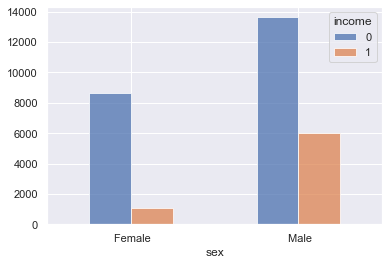

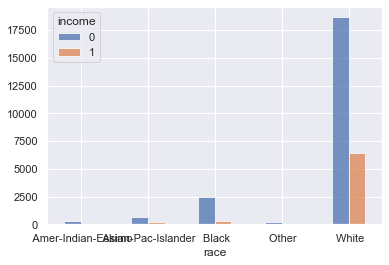

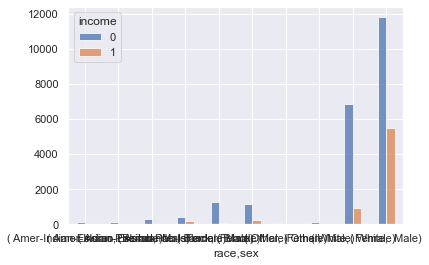

In [26]:
train.pivot_table(index="sex", columns="income", values="age", aggfunc="count").plot(kind='bar', alpha=0.75, rot=0)
train.pivot_table(index="race", columns="income", values="sex", aggfunc="count").plot(kind='bar', alpha=0.75, rot=0)
train.pivot_table(index=["race","sex"], columns="income", values="age", aggfunc="count").plot(kind='bar', alpha=0.75, rot=0)

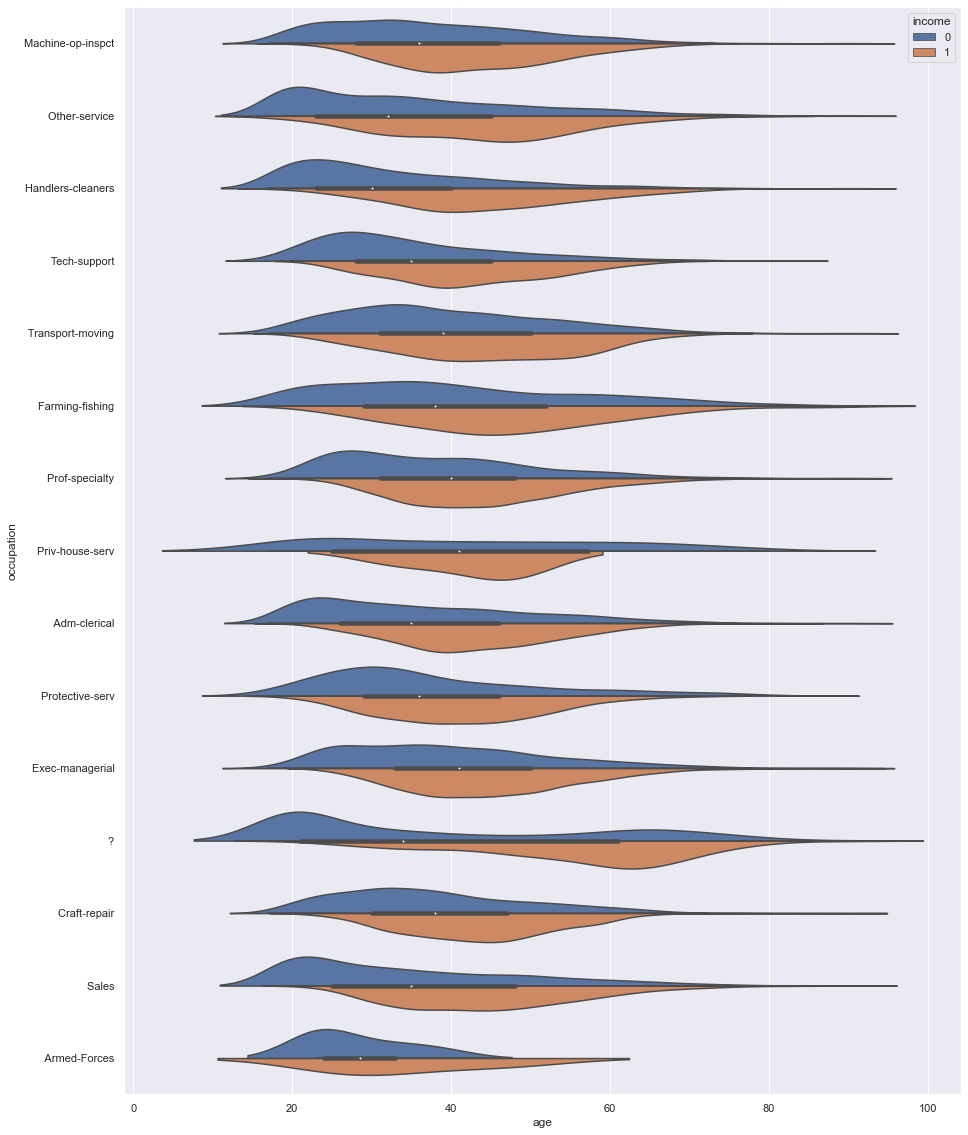

In [27]:
plt.figure(figsize=(15,20))
sns.violinplot(data=train, x="age", y="occupation", hue="income", split=True)

### 하이퍼파라미터 튜닝

In [109]:
test_score_list=[] #이웃을 변경하면서 나오는 test 점수를 넣을리스트
train_score_list=[] # train 점수를 넣을 list
max_value=-1;
K=1;
for k in range(1,90):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X,y) #훈련 데이터 학습
    test_pre=model.predict(X)#평가 데이터 예측
    test_score=accuracy_score(y,test_pre)# 테스트데이터의 정확도
    if max_value < test_score:
        max_value=test_score
        K=k
    test_score_list.append(test_score)
    #훈련 데이터에 대한 점수 계산
    train_score=model.score(X, y)
    train_score_list.append(train_score)
print(K)

68


In [110]:
max_depths = [6, 8, 10, 12, 16, 20, 24, 30,36,40,44,48]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=210)
    dt_clf.fit(X, y)
    pred = dt_clf.predict(X)
    accuracy = accuracy_score(y, pred)
    print('max_depth = {0} 정확도 : {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도 : 0.8231
max_depth = 8 정확도 : 0.8234
max_depth = 10 정확도 : 0.8234
max_depth = 12 정확도 : 0.8234
max_depth = 16 정확도 : 0.8234
max_depth = 20 정확도 : 0.8234
max_depth = 24 정확도 : 0.8234
max_depth = 30 정확도 : 0.8234
max_depth = 36 정확도 : 0.8234
max_depth = 40 정확도 : 0.8234
max_depth = 44 정확도 : 0.8234
max_depth = 48 정확도 : 0.8234


In [111]:
knn_model=KNeighborsClassifier(n_neighbors=68)# 기본 이웃 수는 5개 
tree_model=DecisionTreeClassifier(max_depth=6, random_state=210)

In [112]:
X.shape, y.shape

((29305, 5), (29305,))

In [113]:
knn_model.fit(X,y)
tree_model.fit(X,y)

DecisionTreeClassifier(max_depth=6, random_state=210)

### 예측

In [114]:
X_test=test[feature_names]
X_test.shape

(19537, 5)

In [115]:
knn_pre=knn_model.predict(X_test)
tree_pre=tree_model.predict(X_test)

### 평가

In [116]:
submission=pd.read_csv("smhrd20210201 (1)/sample_submission.csv")
submission


,no,income
0,29306,0
1,29307,0
2,29308,0
3,29309,0
4,29310,0
...,...,...
19532,48838,1
19533,48839,0
19534,48840,1
19535,48841,0


In [117]:
submission["income"]=knn_pre
submission.to_csv("smhrd20210201 (1)/knn_pre_16_sonjunho.csv", index=False)
submission["income"]=tree_pre
submission.to_csv("smhrd20210201 (1)/tree_pre_16_sonjunho.csv", index=False)
